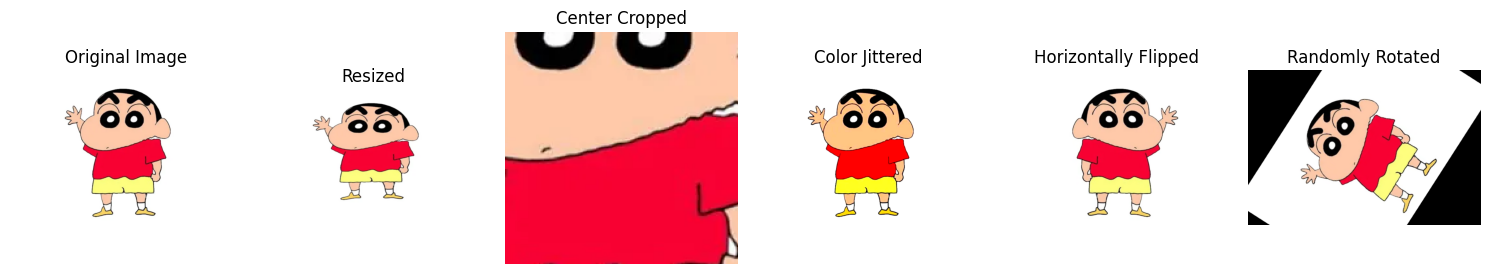

In [ ]:
iimport torch
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


def load_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content))


transforms_dict = {
    "Original Image": None,
    "Resized": transforms.Resize((1000, 2000)),
    "Center Cropped": transforms.CenterCrop(179),
    "Color Jittered": transforms.ColorJitter(brightness=0.7, contrast=0.8, saturation=0.9),
    "Horizontally Flipped": transforms.RandomHorizontalFlip(p=0.63),
    "Randomly Rotated": transforms.RandomRotation(87)
}


img_url = 'https://miro.medium.com/v2/resize:fit:4800/format:webp/1*XGw9zUEZGYPNmeKGmyeX1g.jpeg'
img = load_image(img_url)


fig, ax = plt.subplots(1, 6, figsize=(15, 5))  # 1 row，6 column


for i, (title, transform) in enumerate(transforms_dict.items()):
    transformed_img = img
    if transform:
        transformed_img = transform(transformed_img)
    ax[i].imshow(transformed_img)
    ax[i].set_title(title)
    ax[i].axis('off')

plt.tight_layout()
plt.show()
